In [1]:
import numpy as np
import matplotlib.pyplot as plt

from monopyly.game import double_dice

%matplotlib inline

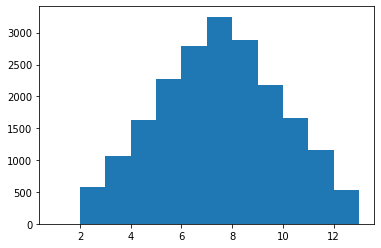

In [2]:
plt.hist(double_dice(n_rolls=19999), bins=list(range(1, 14)));

In [44]:
dice_dict = {
    0: 0,
    1: 0,
    2: 1/36,
    3: 2/36,
    4: 3/36,
    5: 4/36,
    6: 5/36,
    7: 6/36,
    8: 5/36,
    9: 4/36,
    10: 3/36,
    11: 2/36,
    12:1/36,
}

In [7]:
board = np.zeros(shape=(11,11))

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [135]:
states = list(range(0, 40)) # + [40, 42] # ends at 39 + jail

n_states = len(states)
P_ij = np.zeros(shape=(n_states, n_states))


# TODO: YOU ROLL 3 DOUBLES

# TODO: Go to jail
# Turn 1: Roll double is out immedeiately and to the location of the double throw
# Turn 2: """"""
# Turn 3: Roll if double: out and to location, if not still go to location.

# https://monopoly.fandom.com/wiki/Chance
# https://monopoly.fandom.com/wiki/Community_Chest

In [136]:
dice_probabilities = list(map(dice_dict.get, range(0, 13)))

for i in range(0, 40):
    np.put(P_ij[i],
           list(range(i, i + 13)),
           dice_probabilities,
           mode='wrap'
          )

In [137]:
states = states + [40, 41]
n_states = len(states)
P_ij = np.concatenate((P_ij, np.zeros(shape = (2, 40))))
P_ij = np.concatenate((P_ij, np.zeros(shape = (42, 2))), axis = 1)

In [138]:
# From 30, the player has to roll double to move forward, so it will go to 40 if the roll is != (1, 1), (2, 2), ..., (6, 6). Let's type out P_{30,j} manually.
P_ij[30, :] = 0
P_ij[[30, 40], 10:23] = [0, 0, 1/36, 0, 1/36, 0, 1/36, 0, 1/36, 0, 1/36, 0, 1/36]
P_ij[30][40] = 30/36
P_ij[40][41] = 30/36
P_ij[41] = P_ij[10]

In [139]:
P_ij[0]

array([0.        , 0.        , 0.02777778, 0.05555556, 0.08333333,
       0.11111111, 0.13888889, 0.16666667, 0.13888889, 0.11111111,
       0.08333333, 0.05555556, 0.02777778, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        ])

In [190]:
n_turns = 100000
square = 0
square_counts = [0] * len(states)

for i in range(n_turns):
    new_square = np.random.choice(states, p=P_ij[square])
    square_counts[new_square] += 1
    square = new_square

In [191]:
square_counts

[2185,
 2221,
 2250,
 2234,
 2166,
 2211,
 2247,
 2169,
 2215,
 2182,
 2281,
 2223,
 2368,
 2334,
 2465,
 2437,
 2613,
 2583,
 2666,
 2542,
 2648,
 2529,
 2711,
 2581,
 2543,
 2586,
 2627,
 2580,
 2584,
 2519,
 2683,
 2574,
 2478,
 2379,
 2485,
 2271,
 2118,
 2075,
 2135,
 2188,
 2244,
 1870]

In [ ]:
# Multiply all the states before creating jail by the number of times you rolled double.

